In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/SIRA_601/MyCode

In [ ]:
!pip install  pydicom

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pydicom
import json
import os
import numpy as np


In [ ]:
# # CSV file
# df_csv = pd.read_csv('data.csv')
# print(df_csv.head())

# # Excel file
# df_excel = pd.read_excel('data.xlsx')
# print(df_excel.head())

# # Json file
# df_json = pd.read_json('data.json')
# print(df_json.head())

# # Reading a text file
# with open('data.txt', 'r') as file:
#     lines = file.readlines()
#     for line in lines[:5]:
#         print(line.strip())


# # Reading dicom file
# dicom_data = pydicom.dcmread('image.dcm')

# # Show basic DICOM tags
# print(dicom_data)

# # Optional: Access pixel array
# pixel_array = dicom_data.pixel_array

# # Display image
# plt.imshow(pixel_array, cmap='gray')
# plt.title('DICOM Image')
# plt.axis('off')
# plt.show()

In [ ]:
# Check files
files_in_data = os.listdir("/content/drive/MyDrive/SIRA_601/MyCode")
files_in_data


In [ ]:
df = pd.read_excel("Conference.xlsx").dropna()
df.head()

# Data analysis (CSV file)

## Data analysis: 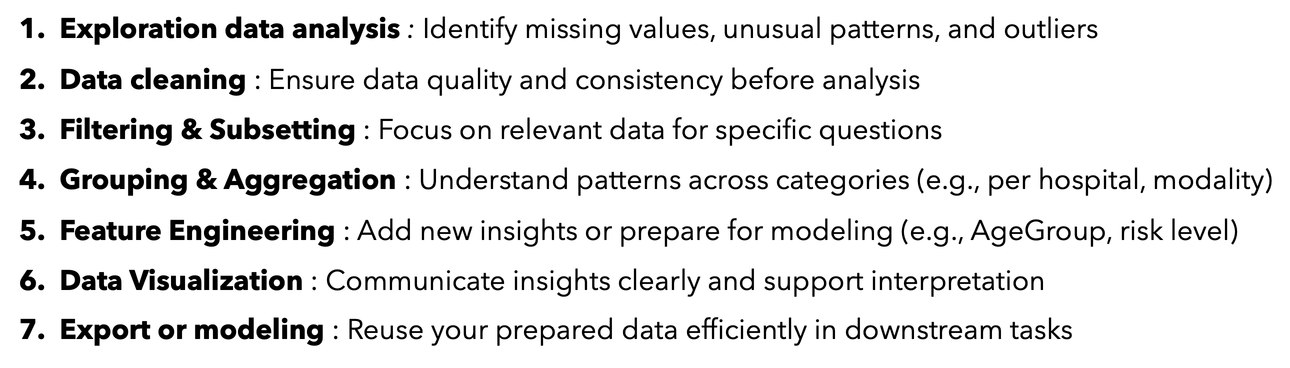

In [ ]:
df = pd.read_csv("data_cleaning_worksheet.csv")
df.head()

In [ ]:
solutions = [
    df.isnull().any(axis=1).sum(),
    df['Age'].isnull().sum(),
    df['Modality'].dropna().nunique(),
    round(df['Age'].mean(skipna=True), 2),
    df.duplicated().sum(),
    df['Hospital'].value_counts().idxmax(),
    df['Notes'].fillna("").str.contains("Urgent").sum(),
    df['Gender'].replace("", "Unknown").value_counts().to_dict(),
    df['Modality'].value_counts().idxmax(),
    df[(df['Age'] > 60) & (df['Modality'] == 'CT')].shape[0]
]

pd.DataFrame(solutions, columns=['Solution'])

In [ ]:
# 1. Filter patients older than 65
df[df['Age'] > 65]

# 2. Filter female patients who received MRI
df[(df['Gender'] == 'Female') & (df['Modality'] == 'MRI')]

# 3. Select only PatientID and Modality columns
df[['PatientID', 'Modality']]

# 4. Retrieve rows from index 10 to 19
df[(df['Gender'] == 'Male') & (df['Hospital'] == 'Hospital B')]

# 5. Count how many patients are in each modality
df['Modality'].value_counts()
# or
df.groupby('Modality')['PatientID'].count()

# 6. Calculate the average age for each modality
df.groupby('Modality')['Age'].mean()

# 7. Get the mean and max age per gender
df.groupby('Gender')['Age'].agg(['mean', 'max'])

# 8. Create pivot table showing average age per hospital
pd.pivot_table(df, index='Hospital', values='Age', aggfunc='mean')

# 9. Create an AgeGroup column with bins
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 40, 60, 100], labels=['Young', 'Adult', 'Senior'])

# 10. Encode gender to numeric values
df['ModalityCode'] = df['Modality'].map({
    'CT': 0,
    'MRI': 1,
    'SPECT': 2,
    'Ultrasound': 3
})



# Json file

In [ ]:
with open("radiology_reports.json", "r") as f:
    data = json.load(f)

# ตัวอย่าง: แสดงผลข้อมูลของคนแรก
first_entry = data[0]

# เข้าถึงข้อมูลผู้ป่วย
print("Patient Name:", first_entry["Patient"]["Name"])
print("Age:", first_entry["Patient"]["Age"])

# เข้าถึง Study ข้อมูล
print("Modality:", first_entry["Study"]["Modality"])
print("Study Date:", first_entry["Study"]["StudyDate"])

# เข้าถึงภาพ slice ที่ 2
print("First Image Path:", first_entry["Study"]["Images"][1]["ImagePath"])

# เข้าถึงผลรายงาน
print("Impression:", first_entry["Report"]["Impression"])


In [ ]:
formatted_json = json.dumps(data[:2], indent=4, sort_keys=True)
print(formatted_json)


In [ ]:
name = first_entry['Patient']['Name']
age = first_entry['Patient']['Age']
modality = first_entry['Study']['Modality']

print(name, age, modality)


In [ ]:
images = first_entry['Study']['Images']
num_images = len(images)
start = images[0]['SliceLocation']
end = images[-1]['SliceLocation']

print(f"{num_images} images from SliceLocation {start} to {end}")

for id in images:
  imageid = id['ImageID']
  imagepath = id['ImagePath']
  print(imageid, imagepath)

In [ ]:
'Normal' in first_entry['Report']['Impression']  # True


In [ ]:
first_entry['Study']['Institution'] = "Radiology Center A"
print(first_entry['Study']['Institution'])

formatted_json = json.dumps(first_entry, indent=4, sort_keys=True)
print(formatted_json)

In [ ]:
df = pd.DataFrame([{
    'PatientID': first_entry['Patient']['ID'],
    'Name': first_entry['Patient']['Name'],
    'Age': first_entry['Patient']['Age'],
    'Modality': first_entry['Study']['Modality'],
    'NumImages': len(first_entry['Study']['Images']),
    'Impression': first_entry['Report']['Impression']
}])
df

In [ ]:
slice_range = first_entry['Study']['Images'][-1]['SliceLocation'] - first_entry['Study']['Images'][0]['SliceLocation']
if slice_range > 100:
    print("⚠️ Warning: Large image range")
else:
    print("✅ No warning")


In [ ]:
# Create a table of common DICOM tags with descriptions and example values
dicom_tags = [
    {"Tag": "(0010,0010)", "Name": "Patient's Name", "VR": "PN", "Example": "John^Smith"},
    {"Tag": "(0010,0020)", "Name": "Patient ID", "VR": "LO", "Example": "P123456"},
    {"Tag": "(0010,0030)", "Name": "Patient's Birth Date", "VR": "DA", "Example": "19700101"},
    {"Tag": "(0010,0040)", "Name": "Patient's Sex", "VR": "CS", "Example": "M"},
    {"Tag": "(0008,0020)", "Name": "Study Date", "VR": "DA", "Example": "20250707"},
    {"Tag": "(0008,0030)", "Name": "Study Time", "VR": "TM", "Example": "143000"},
    {"Tag": "(0008,0050)", "Name": "Accession Number", "VR": "SH", "Example": "A12345"},
    {"Tag": "(0008,0060)", "Name": "Modality", "VR": "CS", "Example": "CT"},
    {"Tag": "(0008,1030)", "Name": "Study Description", "VR": "LO", "Example": "CT Brain with Contrast"},
    {"Tag": "(0008,103E)", "Name": "Series Description", "VR": "LO", "Example": "Axial slices"},
    {"Tag": "(0020,000D)", "Name": "Study Instance UID", "VR": "UI", "Example": "1.2.840.113619.2.55.3.604688433.1234"},
    {"Tag": "(0020,000E)", "Name": "Series Instance UID", "VR": "UI", "Example": "1.2.840.113619.2.55.3.604688433.5678"},
    {"Tag": "(0020,0010)", "Name": "Study ID", "VR": "SH", "Example": "S78901"},
    {"Tag": "(0020,0011)", "Name": "Series Number", "VR": "IS", "Example": "3"},
    {"Tag": "(0020,0013)", "Name": "Instance Number", "VR": "IS", "Example": "15"},
    {"Tag": "(0028,0010)", "Name": "Rows", "VR": "US", "Example": "512"},
    {"Tag": "(0028,0011)", "Name": "Columns", "VR": "US", "Example": "512"},
    {"Tag": "(0028,0030)", "Name": "Pixel Spacing", "VR": "DS", "Example": "0.4883\\0.4883"},
    {"Tag": "(0028,0100)", "Name": "Bits Allocated", "VR": "US", "Example": "16"},
    {"Tag": "(7FE0,0010)", "Name": "Pixel Data", "VR": "OW/OB", "Example": "(binary image data)"}
]

df_tags = pd.DataFrame(dicom_tags)
df_tags

# Prepare sturcture to be a good plot

In [ ]:
# Average age by modality (long format)
age_by_modality = df.groupby('Modality')['Age'].mean()
age_by_modality.plot(kind='bar')
age_by_modality

In [ ]:
# Count patients per age group (long format)
age_counts = df['AgeGroup'].value_counts().sort_index()
age_counts.plot(kind='bar')
age_counts

In [ ]:
n = df.shape[0]
weights = np.random.normal(loc=65, scale=12, size=n).round(0)
heights = np.random.normal(loc=160, scale=12, size=n).round(0)
df['Weight'] = weights
df['Height'] = heights
df['BMI'] = round(df['Weight'] / (df['Height']/100)**2,2)
plt.scatter(df['Age'], df['BMI']);

In [ ]:
# Example: Count of gender per modality (wide format)
modality_gender = df.groupby(['Modality', 'Gender']).size().unstack()
modality_gender.plot(kind='bar', stacked=True)
modality_gender

In [ ]:
df.groupby(['Modality', 'Gender']).count().unstack()

In [ ]:
df.groupby(['Modality', 'Gender']).size().unstack()

In [ ]:
modality_gender.plot(kind='bar')

In [ ]:
def generate_scan_time(modality):
    if modality == 'SPECT':
        return round(np.clip(np.random.normal(45, 10), 30, 60))
    elif modality == 'MRI':
        return round(np.clip(np.random.normal(150, 20), 120, 180))
    elif modality == 'CT':
        return round(np.clip(np.random.normal(75, 25), 30, 120))
    else:
        return np.nan  # อย่าทำ round(np.nan)

# ไม่แปลงเป็น int ทันที
df['ScanTime_min'] = df['Modality'].apply(generate_scan_time)

# Prepare: mean scan time per modality
summary = df.groupby('Modality')['ScanTime_min'].mean()

# Plot
summary.plot(kind='barh', title='Average Scan Time by Modality')
plt.xlabel('Minutes')
plt.show()


In [ ]:
df_long = df.melt(
    id_vars=['PatientID', 'Modality'],
    value_vars=['Weight', 'Height', 'BMI', 'ScanTime_min'],
    var_name='Variable',
    value_name='Value'
)
print(df_long.head())


In [ ]:
df_wide = df_long.pivot(
    index=['PatientID', 'Modality'],
    columns='Variable',
    values='Value'
).reset_index()

In [ ]:
duplicates = df_long[df_long.duplicated(keep=False)]
print(duplicates)

In [ ]:
df_long_clean = df_long.drop_duplicates(subset=['PatientID', 'Modality', 'Variable'])


df_wide = df_long_clean.pivot(
    index=['PatientID', 'Modality'],
    columns='Variable',
    values='Value'
).reset_index()

df_wide = df_long.pivot_table(
    index=['PatientID', 'Modality'],
    columns='Variable',
    values='Value',
    aggfunc='first'  # หรือ 'mean', 'max' แล้วแต่กรณี
).reset_index()

In [ ]:
data = {
    "PatientID": ["P1001", "P1002", "P1003"],
    "Weight_Jan": [68, 70, 65],
    "Weight_Feb": [67, 71, 66],
    "Weight_Mar": [66, 72, 67]
}

df_wide = pd.DataFrame(data)
df_wide

In [ ]:
df_long = pd.melt(
    df_wide,
    id_vars=["PatientID"],          # คอลัมน์ที่ไม่เปลี่ยน
    value_vars=["Weight_Jan", "Weight_Feb", "Weight_Mar"],  # คอลัมน์ที่จะหลอมรวม ถ้าไม่เขียนถือว่าเอาหมดทุก columns
    var_name="Month",               # ชื่อคอลัมน์ใหม่ที่เก็บชื่อเดิม
    value_name="Weight"             # ชื่อคอลัมน์ใหม่ที่เก็บค่า
)
df_long

In [ ]:
df_wide.melt(
    id_vars="PatientID",
    var_name="Month",
    value_name="Weight"
)


In [ ]:
# ตัดคำว่า 'Weight_' ออกจากชื่อเดือน
df_long['Month'] = df_long['Month'].str.replace('Weight_', '')
df_long

In [ ]:
sns.lineplot(data=df_long, x='Month', y='Weight', hue='PatientID', marker='o')
plt.title("Patient Weight Over Time")
plt.show()

In [ ]:
print(df_wide.set_index("PatientID").T)
df_wide.set_index("PatientID").T.plot(marker='o') # แต่ละ column เป็นค่าที่จะวาดเป็นเส้น (บนแกน Y)


In [ ]:
plt.figure(figsize=(8, 5))
plt.bar(df['Modality'].value_counts().index, df['Modality'].value_counts().values)
plt.title("Number of Patients per Modality")
plt.xlabel("Modality")
plt.ylabel("Count")
plt.show()


In [ ]:
df['Modality'].value_counts().plot(kind='bar', title="Patients per Modality")
plt.xlabel("Modality")
plt.ylabel("Count")
plt.show()
df['Modality'].value_counts()

In [ ]:
import json

# Sample nested data
data = [
    {
        "patient": {
            "id": "P001",
            "name": "John Doe",
            "age": 45,
            "gender": "Male"
        },
        "scan": {
            "modality": "CT",
            "region": "Head",
            "date": "2025-07-10"
        }
    },
    {
        "patient": {
            "id": "P002",
            "name": "Jane Smith",
            "age": 38,
            "gender": "Female"
        },
        "scan": {
            "modality": "MRI",
            "region": "Spine",
            "date": "2025-07-09"
        }
    }
]

# Save to JSON file
with open("nested_patient_data.json", "w") as f:
    json.dump(data, f, indent=4)

# import pandas as pd
from pandas import json_normalize

# Load the JSON file
with open("nested_patient_data.json") as f:
    nested_data = json.load(f)

# Flatten the nested structure into a DataFrame
df = json_normalize(nested_data)

# Show the result
df.head()


# Matplotlib

In [ ]:
plt.plot(df['Age']);

In [ ]:
plt.bar(df['Modality'].value_counts().index, df['Modality'].value_counts().values);


In [ ]:
plt.hist(df['Age'], bins=10);

In [ ]:
plt.scatter(df['Age'], df['ScanTime_min']);

In [ ]:
plt.pie(df['Modality'].value_counts(), labels=df['Modality'].value_counts().index, autopct='%1.1f%%'); #%1.1f%% ทศนิยม 1 ตำแหน่ง

In [ ]:
help(plt.bar)


In [ ]:
x = ['CT', 'MRI', 'SPECT']
y = [50, 40, 60]

plt.bar(x, y, color='lightgreen', edgecolor='black',
        linewidth=2, alpha=0.8, label='Modality', width=0.5, bottom=5, align='center',
        hatch=["//","x","o"])
plt.title("Patients per Modality")
plt.xlabel("Modality")
plt.ylabel("Count")
plt.ylim(0,70)
plt.legend()
plt.show()


In [ ]:
df = pd.read_excel("Conference.xlsx").drop(index=0)

# How many abstracts are submitted for each presentation Type?
type_counts = df['Type'].value_counts()
plt.bar(type_counts.index, type_counts.values)
plt.xticks(rotation=45)
plt.title("Number of Abstracts by Type")
plt.ylabel("Count")
plt.show()

In [ ]:
# Create a heatmap showing the number of abstracts submitted by each Country and their corresponding Status.
pivot = df.pivot_table(index='Country', columns='Status', values='Abstract ID', aggfunc='count')
plt.imshow(pivot.fillna(0), cmap='YlGnBu')

plt.xticks(ticks=np.arange(len(pivot.columns)), labels=pivot.columns, rotation=45)
plt.yticks(ticks=np.arange(len(pivot.index)), labels=pivot.index)

plt.colorbar(label='Number of Abstracts')
plt.title("Abstract Count Heatmap")
plt.tight_layout()
plt.show()


In [ ]:
# Compare the number of abstracts by Category and Status using a grouped bar chart.
category_status = df.groupby(['Category', 'Status']).size().unstack(fill_value=0)
categories = category_status.index
statuses = category_status.columns
x = np.arange(len(categories))

width = 0.35
for i, status in enumerate(statuses):
    plt.barh(x + i*width, category_status[status], height=width, label=status)

plt.yticks(x + width / 2, categories)
plt.legend()
plt.title("Abstract Count by Category and Status")
plt.tight_layout()
plt.show()


# Seaborn

In [ ]:
conference = pd.read_excel("Conference.xlsx").drop(index=0)
sns.countplot(data=conference, x='Type', order=conference['Type'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Number of Abstracts by Type")
plt.show()


In [ ]:
sns.countplot(data=conference, y='Category', hue='Status', order=conference['Category'].value_counts().index)
plt.title("Submission Status by Category")
plt.show()


In [ ]:
heat_df = conference.pivot_table(index='Country', columns='Status', values='Abstract ID', aggfunc='count')
sns.heatmap(heat_df, annot=True, fmt='g', cmap='YlGnBu')
plt.title("Abstract Counts by Country and Review Status")
plt.show()


In [ ]:
top_countries = conference['Country'].value_counts().head(10)

sns.barplot(x=top_countries.values, y=top_countries.index, color='salmon')
plt.title("Top 10 Countries by Number of Abstracts")
plt.xlabel("Number of Abstracts")
plt.ylabel("Country")
plt.show()


In [ ]:
sns.palettes.SEABORN_PALETTES.keys()

In [ ]:
# สี Color Brewer Palettes
# "Set1", "Set2", "Set3", "Pastel1", "Pastel2", "Dark2", "Accent",    # Qualitative
# "Blues", "Greens", "Oranges", "Purples", "Reds", "YlGnBu", "YlOrRd", # Sequential
# "RdBu", "BrBG", "PRGn", "PiYG", "RdYlBu", "RdYlGn", "Spectral"       # Diverging



In [ ]:
reviewed_df = conference[conference['Status'] == 'Reviewed']

sns.countplot(data=reviewed_df, x='Type', order=reviewed_df['Type'].value_counts().index, hue="Type", palette="pastel")
plt.title("Types of Reviewed Abstracts")
plt.xticks(rotation=45)
plt.show()


In [ ]:
df_long = conference.melt(id_vars='Abstract ID', value_vars=['Type', 'Category', 'Country'],
                  var_name='Variable', value_name='Value')
df_long.head()


In [ ]:
sns.countplot(data=df_long, y='Value', hue='Variable',
              order=df_long['Value'].value_counts().iloc[:10].index)
plt.title("Top Values by Variable")
plt.show()


In [ ]:
top_presenters = conference[conference['Status'] == 'Reviewed']['Presenting'].value_counts().head(10)

sns.barplot(x=top_presenters.values, y=top_presenters.index, color='lightgreen')
plt.title("Top 10 Submitted Presenters (Reviewed Abstracts)")
plt.xlabel("Reviewed Abstracts")
plt.ylabel("Presenter")
plt.show()
